<a href="https://colab.research.google.com/github/naseembabu/Python_for_Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/content/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


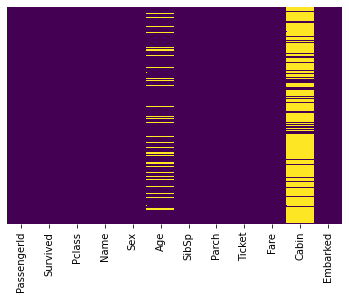

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [6]:
sns.set_style('whitegrid')

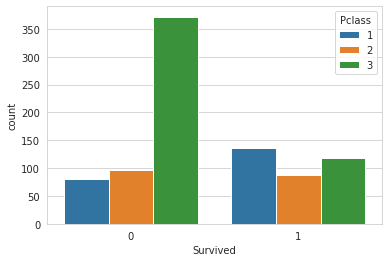

In [11]:
sns.countplot(x = 'Survived',hue = 'Pclass', data=train)

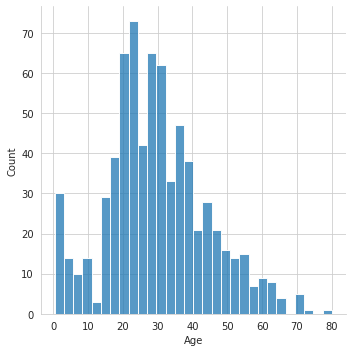

In [12]:
sns.displot(train['Age'].dropna(), kde = False, bins = 30)

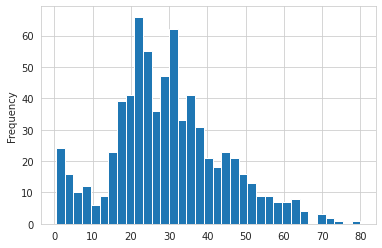

In [14]:
train['Age'].plot.hist(bins = 35)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


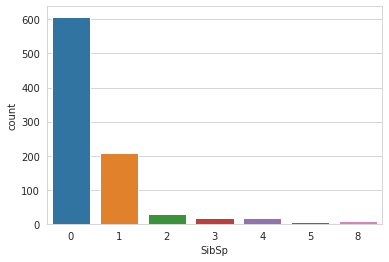

In [16]:
sns.countplot(x = 'SibSp', data = train)

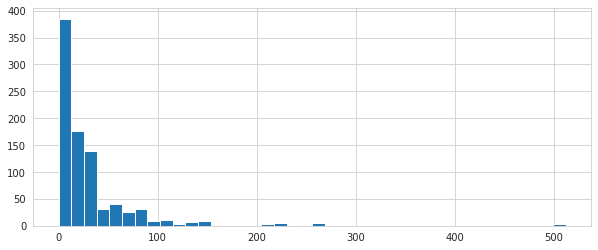

In [19]:
train['Fare'].hist(bins = 40, figsize = (10, 4))

In [20]:
import cufflinks as cf

In [21]:
cf.go_offline()

In [24]:
# train['Fare'].iplot(kind = 'hist', bins = 30)

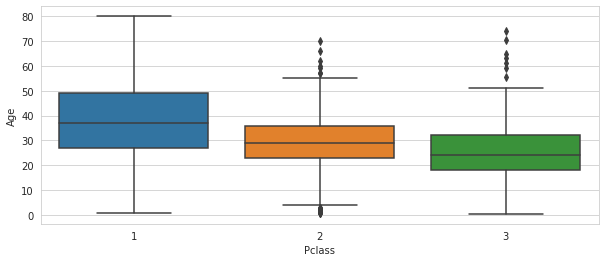

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(x = 'Pclass', y = 'Age', data=train)

In [27]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2: 
      return 29
    else:
      return 24
  else:
    return Age


In [28]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis = 1)

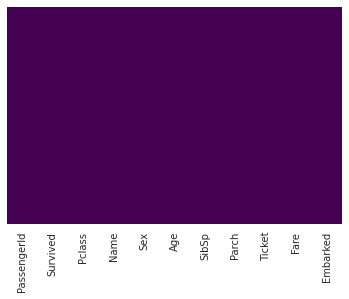

In [37]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [33]:
train.drop('Cabin', axis = 1, inplace =True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
train.dropna(inplace=True)

#Deal with Categorical variable

In [45]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [46]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [53]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [55]:
train = pd.concat([train, sex, embarked], axis = 1)

In [56]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [57]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [58]:
train.drop('PassengerId', axis = 1, inplace=True)

In [59]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
x = train.drop('Survived',axis = 1)
y = train['Survived']

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 101)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()

In [66]:
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predictions  = logmodel.predict(x_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       174
           1       0.83      0.68      0.74       120

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test, predictions)

array([[157,  17],
       [ 39,  81]])